In [1]:
import sys
from pathlib import Path
wdir = Path.cwd().parent.absolute()
sys.path.insert(1, str(wdir))

from models.EEGModels import EEGNet, ShallowConvNet, DeepConvNet, EEGNet_ChanRed, CapsEEGNet, TCNet, EEGNet_WT, TCNet_EMD, MLFCapsNet
import torch
import os

In [2]:
from preprocess.preprocess_DREAMER import DREAMERDataset

# dataset = DREAMERDataset('', "valence", tfr=2)

In [3]:
model = EEGNet(nb_classes = 2, Chans = 62, Samples = 200, dropoutRate = 0.1, kernLength = 100, F1 = 8, D = 2, F2 = 16, dropoutType = 'Dropout')

total_params = 0
for name, param in model.named_parameters():
    layer_params = param.numel()
    print(f"Layer: {name}, Parameters: {layer_params}")
    total_params += layer_params

print(f"Total Parameters: {total_params}")

Layer: block1.0.weight, Parameters: 800
Layer: block1.1.weight, Parameters: 8
Layer: block1.1.bias, Parameters: 8
Layer: block1.2.weight, Parameters: 992
Layer: block1.3.weight, Parameters: 16
Layer: block1.3.bias, Parameters: 16
Layer: block2.0.depthwise.weight, Parameters: 256
Layer: block2.0.pointwise.weight, Parameters: 256
Layer: block2.1.weight, Parameters: 16
Layer: block2.1.bias, Parameters: 16
Layer: dense.weight, Parameters: 192
Layer: dense.bias, Parameters: 2
Total Parameters: 2578


In [4]:
model = EEGNet(nb_classes = 3, Chans = 62, Samples = 200, dropoutRate = 0.1, kernLength = 15, F1 = 64, D = 8, F2 = 64, dropoutType = 'Dropout')

total_params = 0
for name, param in model.named_parameters():
    layer_params = param.numel()
    print(f"Layer: {name}, Parameters: {layer_params}")
    total_params += layer_params

print(f"Total Parameters: {total_params}")

Layer: block1.0.weight, Parameters: 960
Layer: block1.1.weight, Parameters: 64
Layer: block1.1.bias, Parameters: 64
Layer: block1.2.weight, Parameters: 31744
Layer: block1.3.weight, Parameters: 512
Layer: block1.3.bias, Parameters: 512
Layer: block2.0.depthwise.weight, Parameters: 8192
Layer: block2.0.pointwise.weight, Parameters: 32768
Layer: block2.1.weight, Parameters: 64
Layer: block2.1.bias, Parameters: 64
Layer: dense.weight, Parameters: 1152
Layer: dense.bias, Parameters: 3
Total Parameters: 76099


In [26]:
model = EEGNet_WT(nb_classes = 3, Chans = 62, InnerChans=24, Samples = 200, dropoutRate = 0.1, kernLength = 25, F1 = 64, D = 8, F2 = 64, dropoutType = 'Dropout', nb_freqs=3)

total_params = 0
for name, param in model.named_parameters():
    layer_params = param.numel()
    print(f"Layer: {name}, Parameters: {layer_params}")
    total_params += layer_params

print(f"Total Parameters: {total_params}")

Layer: chan_reduction.weight, Parameters: 4464
Layer: chan_reduction.bias, Parameters: 72
Layer: block1.0.weight, Parameters: 4800
Layer: block1.1.weight, Parameters: 64
Layer: block1.1.bias, Parameters: 64
Layer: block1.2.weight, Parameters: 12288
Layer: block1.3.weight, Parameters: 512
Layer: block1.3.bias, Parameters: 512
Layer: block2.0.depthwise.weight, Parameters: 8192
Layer: block2.0.pointwise.weight, Parameters: 32768
Layer: block2.1.weight, Parameters: 64
Layer: block2.1.bias, Parameters: 64
Layer: dense.weight, Parameters: 1152
Layer: dense.bias, Parameters: 3
Total Parameters: 65019


In [6]:
x = torch.randn(8, 14, 48, 128)
out = model(x)
print(out.shape)

torch.Size([8, 2])


/Users/juliengadonneix/anaconda3/envs/intern3A/lib/python3.9/site-packages/torch/nn/modules/conv.py:456: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1712608633180/work/aten/src/ATen/native/Convolution.cpp:1032.)
  return F.conv2d(input, weight, bias, self.stride,


In [27]:
model_SEED = EEGNet_ChanRed(nb_classes = 5, Chans = 62, InnerChans=24, Samples = 200, dropoutRate = 0.1, kernLength = 15, F1 = 64, D = 8, F2 = 64, dropoutType = 'Dropout')

total_params = 0
for name, param in model_SEED.named_parameters():
    layer_params = param.numel()
    print(f"Layer: {name}, Parameters: {layer_params}")
    total_params += layer_params

print(f"Total Parameters: {total_params}")

Layer: chan_reduction.weight, Parameters: 1488
Layer: chan_reduction.bias, Parameters: 24
Layer: block1.0.weight, Parameters: 960
Layer: block1.1.weight, Parameters: 64
Layer: block1.1.bias, Parameters: 64
Layer: block1.2.weight, Parameters: 12288
Layer: block1.3.weight, Parameters: 512
Layer: block1.3.bias, Parameters: 512
Layer: block2.0.depthwise.weight, Parameters: 8192
Layer: block2.0.pointwise.weight, Parameters: 32768
Layer: block2.1.weight, Parameters: 64
Layer: block2.1.bias, Parameters: 64
Layer: dense.weight, Parameters: 1920
Layer: dense.bias, Parameters: 5
Total Parameters: 58925


In [8]:
x = torch.randn(8, 1, 14, 128)
y = model_SEED(x)
print(y.size())

torch.Size([8, 2])


In [9]:
model_capseegnet = MLFCapsNet(nb_classes=2, device='cpu')

total_params = 0
for name, param in model_capseegnet.named_parameters():
    layer_params = param.numel()
    print(f"Layer: {name}, Parameters: {layer_params}")
    total_params += layer_params

print(f"Total Parameters: {total_params}")

Layer: conv.weight, Parameters: 9216
Layer: conv.bias, Parameters: 256
Layer: primaryCaps.caps.weight, Parameters: 2359296
Layer: primaryCaps.caps.bias, Parameters: 256
Layer: primaryCaps.caps2.weight, Parameters: 131072
Layer: primaryCaps.caps2.bias, Parameters: 256
Layer: emotionCaps.W, Parameters: 1048576
Total Parameters: 3548928


In [19]:
x = torch.randn(8, 1, 14, 128)
y = model_capseegnet(x)
print(y.size())

torch.Size([8, 2])


In [10]:
model_capseegnet = CapsEEGNet(nb_classes=2, Chans=14)

total_params = 0
for name, param in model_capseegnet.named_parameters():
    layer_params = param.numel()
    print(f"Layer: {name}, Parameters: {layer_params}")
    total_params += layer_params

print(f"Total Parameters: {total_params}")

Layer: block_1_2.0.weight, Parameters: 512
Layer: block_1_2.1.weight, Parameters: 8
Layer: block_1_2.1.bias, Parameters: 8
Layer: block_1_2.3.weight, Parameters: 224
Layer: block_1_2.4.weight, Parameters: 16
Layer: block_1_2.4.bias, Parameters: 16
Layer: primaryCaps.caps.weight, Parameters: 24576
Layer: primaryCaps.caps.bias, Parameters: 256
Layer: primaryCaps.caps2.weight, Parameters: 69632
Layer: primaryCaps.caps2.bias, Parameters: 256
Layer: emotionCaps.W, Parameters: 1048576
Layer: fc.weight, Parameters: 16
Layer: fc.bias, Parameters: 1
Total Parameters: 1144097


In [11]:
x = torch.randn(8, 1, 14, 128)
y = model_capseegnet(x)
print(y.size())
print(y)

torch.Size([8, 2])
tensor([[0.5005, 0.4995],
        [0.5004, 0.4996],
        [0.5006, 0.4994],
        [0.5003, 0.4997],
        [0.5001, 0.4999],
        [0.4999, 0.5001],
        [0.5014, 0.4986],
        [0.5001, 0.4999]], grad_fn=<SoftmaxBackward0>)


In [20]:
model_tcnet = TCNet(nb_classes=2, Chans=14)


total_params = 0
for name, param in model_tcnet.named_parameters():
    layer_params = param.numel()
    print(f"Layer: {name}, Parameters: {layer_params}")
    total_params += layer_params

print(f"Total Parameters: {total_params}")

Layer: PatchPartition.weight, Parameters: 5376
Layer: PatchPartition.bias, Parameters: 32
Layer: stages.0.WMSA.pos_embeddings, Parameters: 9
Layer: stages.0.WMSA.linear1.weight, Parameters: 3072
Layer: stages.0.WMSA.linear1.bias, Parameters: 96
Layer: stages.0.WMSA.linear2.weight, Parameters: 1024
Layer: stages.0.WMSA.linear2.bias, Parameters: 32
Layer: stages.0.SWMSA.pos_embeddings, Parameters: 9
Layer: stages.0.SWMSA.linear1.weight, Parameters: 3072
Layer: stages.0.SWMSA.linear1.bias, Parameters: 96
Layer: stages.0.SWMSA.linear2.weight, Parameters: 1024
Layer: stages.0.SWMSA.linear2.bias, Parameters: 32
Layer: stages.0.ln.weight, Parameters: 32
Layer: stages.0.ln.bias, Parameters: 32
Layer: stages.0.MLP.ff.0.weight, Parameters: 4096
Layer: stages.0.MLP.ff.0.bias, Parameters: 128
Layer: stages.0.MLP.ff.2.weight, Parameters: 4096
Layer: stages.0.MLP.ff.2.bias, Parameters: 32
Layer: stages.1.WMSA.pos_embeddings, Parameters: 9
Layer: stages.1.WMSA.linear1.weight, Parameters: 12288
Layer:

In [13]:
x = torch.randn(8, 14, 3, 128)
out = model_tcnet(x)
print(out.shape)

torch.Size([8, 2])


In [14]:
print(os.cpu_count())
print(torch.cuda.device_count()) 
device = torch.device('cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu')
print(device)
print(device.type == 'cuda')
if device.type == 'cuda':
    properties = torch.cuda.get_device_properties(device)
    print(properties)

8
0
mps
False


In [15]:
import subprocess
import plistlib

def get_gpu_info():
    """Get information about the GPU on macOS."""
    # Run system_profiler command and capture the output
    result = subprocess.run(['system_profiler', '-xml', 'SPDisplaysDataType'], capture_output=True)
    if result.returncode == 0:
        # Parse the XML output
        display_info = plistlib.loads(result.stdout)
        # Extract GPU information
        gpu_count = len(display_info[0]['_items'])
        return gpu_count
    else:
        print("Error:", result.stderr)
        return None

gpu_count = get_gpu_info()
if gpu_count is not None:
    print("Number of GPUs:", gpu_count)


Number of GPUs: 1


In [16]:
import time
import torch

start_time = time.time()

# syncrocnize time with cpu, otherwise only time for oflaoding data to gpu would be measured
torch.mps.synchronize()

a = torch.ones(4000,4000, device="mps")
for _ in range(200):
   a +=a

elapsed_time = time.time() - start_time
print( "GPU Time: ", elapsed_time)

GPU Time:  0.5802161693572998


In [24]:
import numpy as np

t = [95.36, 95.85, 96.58, 93.53, 95.39, 92.45, 94.02, 94.91, 89.30, 94.58, 91.78, 93.40, 94.29, 91.94, 96.15, 94.58, 93.72, 95.20, 95.77, 93.05, 92.08, 96.98, 89.57]
print(len(t))
print(sum(t)/len(t))
print(np.std(t))

23
93.93391304347826
1.9995537309293168


In [149]:
import numpy as np

max_value = 100.0
n = 15

def generate_list_with_constraints(n, desired_mean, desired_std, max_value):
    while True:
        random_list = np.random.randn(n)
        actual_mean = np.mean(random_list)
        actual_std = np.std(random_list)
        adjusted_list = (random_list - actual_mean) / actual_std  # Normalize to mean=0, std=1
        adjusted_list = adjusted_list * desired_std + desired_mean  # Scale and shift to desired mean and std
        if np.all(adjusted_list < max_value):
            return adjusted_list.tolist()

desired_mean = 85.34
desired_std = 2.79
eegnet = generate_list_with_constraints(n, desired_mean, desired_std, max_value)

desired_mean = 96.90
desired_std = 0.88
eegnet_optim = generate_list_with_constraints(n, desired_mean, desired_std, max_value)

desired_mean = 98.56
desired_std = 0.70
eegnet_innerChans = generate_list_with_constraints(n, desired_mean, desired_std, max_value)

desired_mean = 98.47
desired_std = 1.72
actnn = generate_list_with_constraints(n, desired_mean, desired_std, max_value)

desired_mean = 97.30
desired_std = 1.74
jdat = generate_list_with_constraints(n, desired_mean, desired_std, max_value)


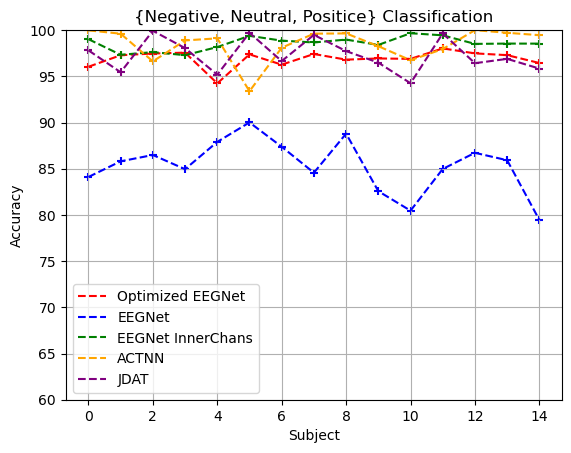

In [150]:
import matplotlib.pyplot as plt

plt.plot(eegnet_optim, label='Optimized EEGNet', color='red', linestyle='dashed')
plt.scatter(range(n), eegnet_optim, color='red', marker='+')
plt.plot(eegnet, label='EEGNet', color='blue', linestyle='dashed')
plt.scatter(range(n), eegnet, color='blue', marker='+')
plt.plot(eegnet_innerChans, label='EEGNet InnerChans', color='green', linestyle='dashed')
plt.scatter(range(n), eegnet_innerChans, color='green', marker='+')
plt.plot(actnn, label='ACTNN', color='orange', linestyle='dashed')
plt.scatter(range(n), actnn, color='orange', marker='+')
plt.plot(jdat, label='JDAT', color='purple', linestyle='dashed')
plt.scatter(range(n), jdat, color='purple', marker='+')

plt.xlabel('Subject')
plt.ylabel('Accuracy')
plt.title('{Negative, Neutral, Positice} Classification')
plt.ylim(60, 100)
plt.legend()
plt.grid()
plt.show()